In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])


C:\Users\akarte\AppData\Local\Temp\ipykernel_28068\2697057228.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])


<Axes: xlabel='Dates'>

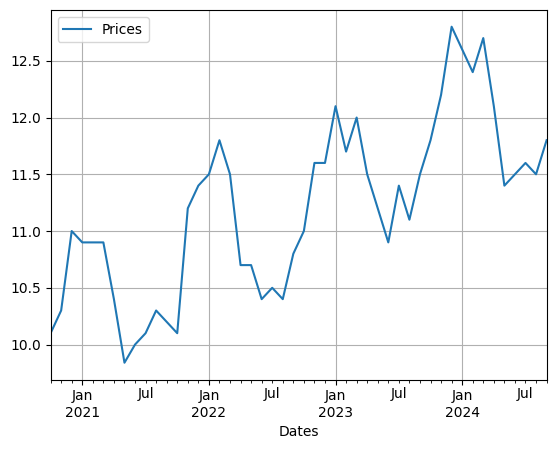

In [4]:
gas.plot(x = 'Dates', y = 'Prices' , grid= True)

In [5]:
# time series - statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

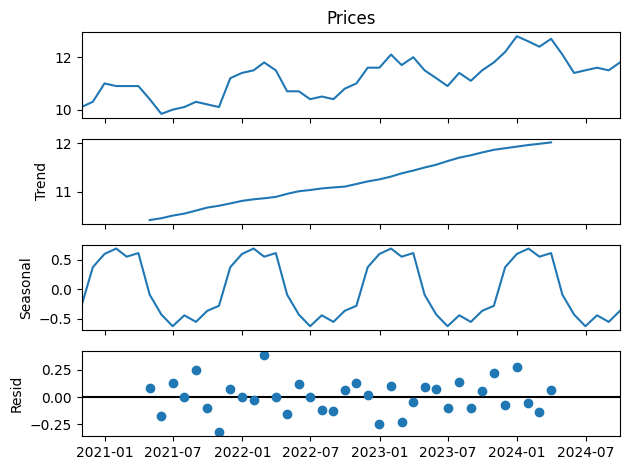

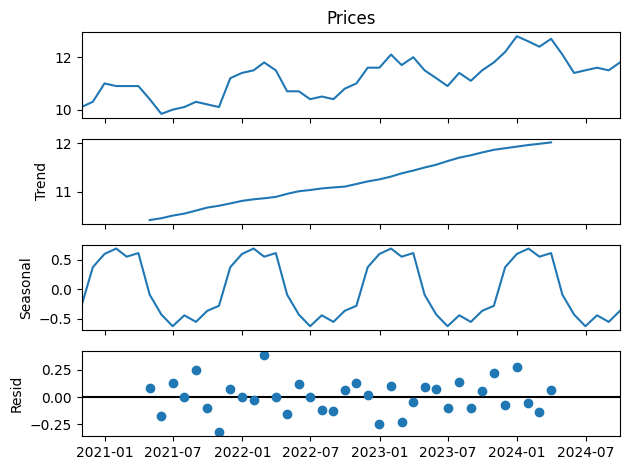

In [6]:
gas = gas.set_index('Dates')
decomposed = seasonal_decompose(gas['Prices'],model='additive')
decomposed.plot()

In [7]:
m = 12
alpha = 1/(2*m)

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='Dates'>

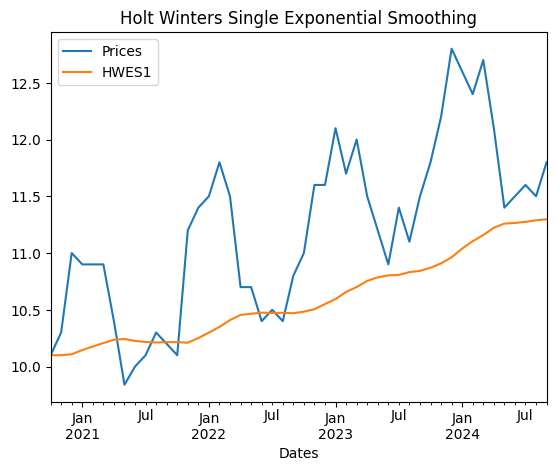

In [8]:
#just trying simple exponentail smoothing
gas['HWES1'] = SimpleExpSmoothing(gas['Prices']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
gas[['Prices','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Dates'>

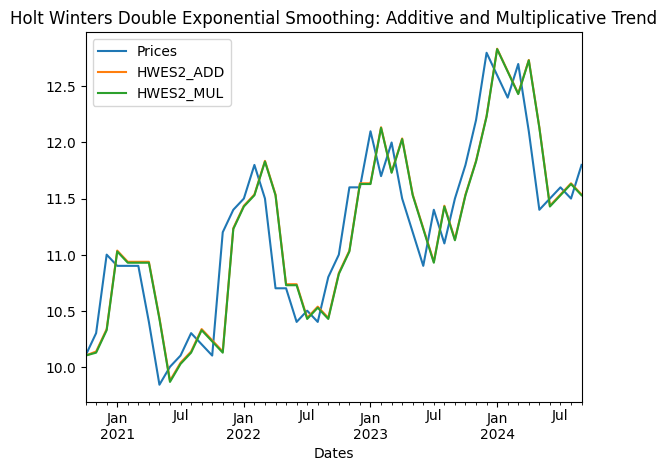

In [9]:
gas['HWES2_ADD'] = ExponentialSmoothing(gas['Prices'],trend='add').fit().fittedvalues
gas['HWES2_MUL'] = ExponentialSmoothing(gas['Prices'],trend='mul').fit().fittedvalues
gas[['Prices','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Dates'>

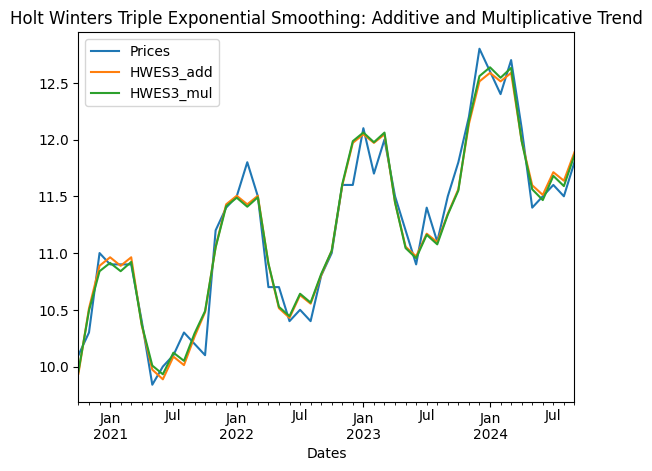

In [10]:
gas['HWES3_add'] = ExponentialSmoothing(gas['Prices'], trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
gas['HWES3_mul'] = ExponentialSmoothing(gas['Prices'], trend='add', seasonal='mul').fit().fittedvalues
gas[['Prices','HWES3_add','HWES3_mul']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Trend')


In [11]:
#gas = pd.read_csv('nat_gas.csv',parse_dates=['Dates'])
gas_train = gas[:36]
gas_test = gas[36:]

c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Dates'>

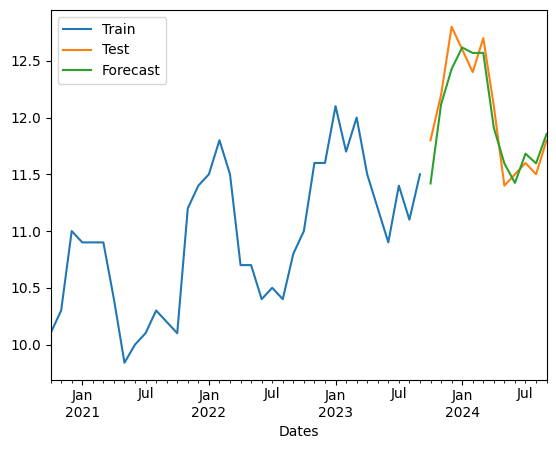

In [12]:
model = ExponentialSmoothing(gas_train['Prices'] , trend='add' , seasonal='mul').fit()
forecast = model.forecast(12)
gas_train['Prices'].plot(legend = True, label = 'Train')
gas_test['Prices'].plot(legend = True, label = 'Test')
forecast.plot(legend = True, label = 'Forecast')

<Axes: xlabel='Dates'>

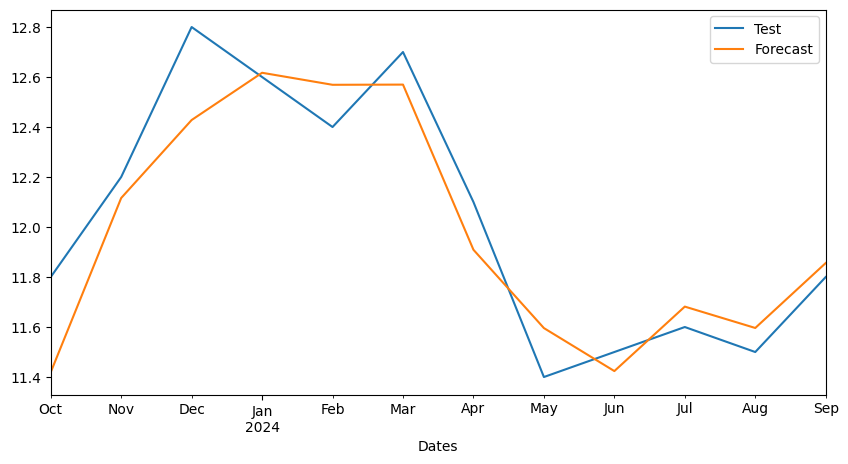

In [13]:
gas_test['Prices'].plot(legend=True, label = 'Test', figsize=(10,5))
forecast.plot(legend = True, label = 'Forecast')

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(gas_test["Prices"],forecast)}')
print(f'Mean Squared Error = {mean_squared_error(gas_test["Prices"],forecast)}')

Mean Absolute Error = 0.1541741054132085
Mean Squared Error = 0.036340753018521965


In [15]:
df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='mul',seasonal_periods=12).fit()
forecast_val = model.forecast(12)

C:\Users\akarte\AppData\Local\Temp\ipykernel_28068\2694449206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])


In [16]:
date_index = pd.date_range('10/31/2024', periods=12, freq='M')
forecast = pd.DataFrame({'dates': date_index,
                         'prices':forecast_val})
forecast = forecast.set_index('dates')

<Axes: xlabel='Dates'>

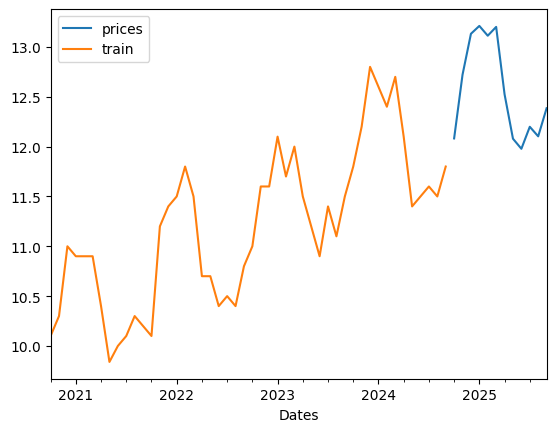

In [17]:
forecast.plot(label = 'forecast', legend=True)
gas['Prices'].plot(label = 'train', legend=True)

C:\Users\akarte\AppData\Local\Temp\ipykernel_28068\3782834232.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
c:\Users\akarte\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Dates'>

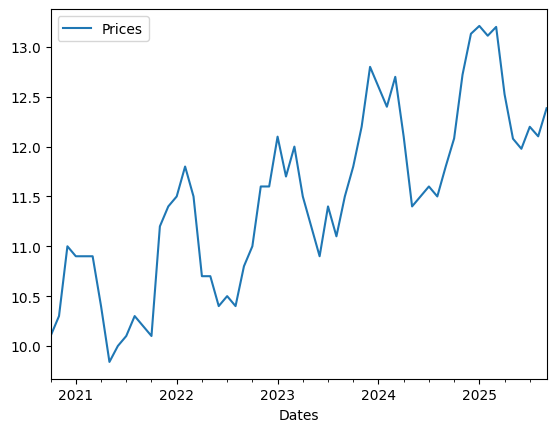

In [18]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('nat_gas.csv', parse_dates=['Dates'])
df = df.set_index('Dates')
model = ExponentialSmoothing(df['Prices'], trend='add', seasonal='mul',seasonal_periods=12).fit()
forecast_val = model.forecast(12)
date_index = pd.date_range('10/31/2024', periods=12, freq='M')
forecast = pd.DataFrame({'Dates': date_index,
                         'Prices':forecast_val})
forecast = forecast.set_index('Dates')
df = pd.concat([df,forecast])

df.plot()